###  3D Visualization of the both genres 

#### Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
import matplotlib.dates as mdates
import numpy as np; np.random.seed(24191)
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates
import matplotlib.pyplot as plt
%matplotlib inline

import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

C:\Users\upend\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


#### Loading the comics and graphics dataset

In [2]:
df = pd.read_json("books_metadata_final.json")
df

,text_reviews_count,language_code,popular_shelves,is_ebook,average_rating,description,authors,publication_year,book_id,ratings_count,work_id,title
2,5,eng,"[{'count': '493', 'name': 'to-read'}, {'count'...",false,4.28,The questions plaguing Captain America's dream...,"[{'author_id': '37450', 'role': ''}]",2012,13571772,51,102217,Captain America: Winter Soldier (The Ultimate ...
4,6,en-US,"[{'count': '20', 'name': 'to-read'}, {'count':...",false,4.06,These are the stories that catapulted Superman...,"[{'author_id': '81563', 'role': ''}, {'author_...",1997,707611,51,693886,"Superman Archives, Vol. 2"
6,9,eng,"[{'count': '47', 'name': 'to-read'}, {'count':...",false,4.15,PRODUCT DESCRIPTION: The first new volume of G...,"[{'author_id': '14965', 'role': ''}, {'author_...",2016,27036536,39,47077783,"War Stories, Volume 3"
11,26,eng,"[{'count': '104', 'name': 'to-read'}, {'count'...",false,3.16,Sir Arthur Conan Doyle's dauntless detective r...,"[{'author_id': '61231', 'role': ''}, {'author_...",2011,11827783,114,16782451,Sherlock Holmes: Year One
12,6,eng,"[{'count': '133', 'name': 'manga'}, {'count': ...",false,4.41,This is the story of a group of boys who try t...,"[{'author_id': '294649', 'role': ''}]",2012,12349665,149,3062163,"Naoki Urasawa's 20th Century Boys, Volume 20 (..."
...,...,...,...,...,...,...,...,...,...,...,...,...
89401,4,eng,"[{'count': '54', 'name': 'manga'}, {'count': '...",false,4.09,"Student by day, demon hunter by night! R to L ...","[{'author_id': '8342728', 'role': ''}]",2009,6419558,172,6608706,"Kekkaishi, Vol. 19 (Kekkaishi, #19)"
89402,3,eng,"[{'count': '9', 'name': 'to-read'}, {'count': ...",false,4.73,"""A FULL CONFESSION""\nSolve one murder, uncover...","[{'author_id': '356424', 'role': ''}]",2016,32598998,3,53177155,The Black Monday Murders #3
89404,53,eng,"[{'count': '625', 'name': 'to-read'}, {'count'...",false,3.74,The vampire epic by best-selling author George...,"[{'author_id': '13557729', 'role': 'Adaptor'},...",2011,10644600,853,18566693,Fevre Dream
89409,2,eng,"[{'count': '1', 'name': '3-2017-ha-pages-read-...",true,3.00,Prepare yourself for Dejah Thoris as you've ne...,"[{'author_id': '5740317', 'role': 'Writer'}, {...",2016,28928706,10,49145631,Dejah Thoris #1


#### Here performing required preprocessing steps

In [3]:
from sklearn.preprocessing import StandardScaler
X = df[['average_rating', 'ratings_count', 'text_reviews_count']]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)

In [4]:
## creating a k-means model
k_means = KMeans(init = "k-means++", n_clusters = 3, n_init = 10)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 0 0 ... 0 0 0]


In [5]:
df["group"] = labels
df.head(30)

,text_reviews_count,language_code,popular_shelves,is_ebook,average_rating,description,authors,publication_year,book_id,ratings_count,work_id,title,group
2,5,eng,"[{'count': '493', 'name': 'to-read'}, {'count'...",false,4.28,The questions plaguing Captain America's dream...,"[{'author_id': '37450', 'role': ''}]",2012,13571772,51,102217,Captain America: Winter Soldier (The Ultimate ...,0
4,6,en-US,"[{'count': '20', 'name': 'to-read'}, {'count':...",false,4.06,These are the stories that catapulted Superman...,"[{'author_id': '81563', 'role': ''}, {'author_...",1997,707611,51,693886,"Superman Archives, Vol. 2",0
6,9,eng,"[{'count': '47', 'name': 'to-read'}, {'count':...",false,4.15,PRODUCT DESCRIPTION: The first new volume of G...,"[{'author_id': '14965', 'role': ''}, {'author_...",2016,27036536,39,47077783,"War Stories, Volume 3",0
11,26,eng,"[{'count': '104', 'name': 'to-read'}, {'count'...",false,3.16,Sir Arthur Conan Doyle's dauntless detective r...,"[{'author_id': '61231', 'role': ''}, {'author_...",2011,11827783,114,16782451,Sherlock Holmes: Year One,0
12,6,eng,"[{'count': '133', 'name': 'manga'}, {'count': ...",false,4.41,This is the story of a group of boys who try t...,"[{'author_id': '294649', 'role': ''}]",2012,12349665,149,3062163,"Naoki Urasawa's 20th Century Boys, Volume 20 (...",0
24,28,eng,"[{'count': '1392', 'name': 'to-read'}, {'count...",false,4.30,Asano Katsuya is the spirit of the United Stat...,"[{'author_id': '5340891', 'role': ''}, {'autho...",2010,13082921,319,18252558,In These Words: Chapter 1,0
29,15,eng,"[{'count': '638', 'name': 'to-read'}, {'count'...",false,4.50,"A century before, in Sablier, a forbidden port...","[{'author_id': '2901559', 'role': 'Creator'}, ...",2012,12958077,113,7551347,"Pandora Hearts, Volume 10",0
32,2,eng,"[{'count': '282', 'name': 'to-read'}, {'count'...",false,3.58,The X-Men are shaken to the core by the Battle...,"[{'author_id': '12424', 'role': ''}, {'author_...",2014,19541857,27,25959476,"All-New X-Men, Vol. 4: All-Different",0
41,25,eng,"[{'count': '68', 'name': 'to-read'}, {'count':...",false,3.93,Pagin' the Ragin' Cajun! When Storm is reverte...,"[{'author_id': '15093', 'role': ''}, {'author_...",2009,6094929,315,6271962,"Gambit Classic, Vol. 1",0
43,34,eng,"[{'count': '129', 'name': 'to-read'}, {'count'...",false,3.75,The ragin' Cajun X-Man's solo adventures conti...,"[{'author_id': '2933191', 'role': 'Writer'}, {...",2013,17277799,370,23891170,"Gambit, Volume 2: Tombstone Blues",0


#### Divided the dataset into 3 groups for better visualization of data points

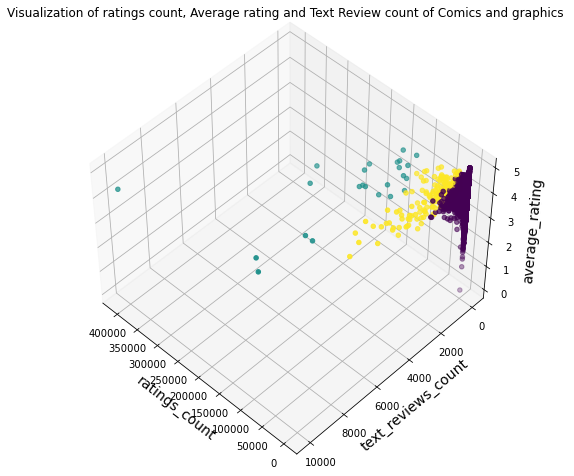

In [6]:

from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(9,6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('ratings_count', fontsize = 14)
ax.set_ylabel('text_reviews_count', fontsize = 14)
ax.set_zlabel('average_rating', fontsize = 14)
ax.set_title('Visualization of ratings count, Average rating and Text Review count of Comics and graphics ')
ax.scatter(X[:, 1], X[:, 2], X[:, 0], c= labels.astype(np.float))

#### Loading the Mystery, Thriller and crime dataset

In [7]:
df = pd.read_json("books_metadata_thriller.json")
df

,text_reviews_count,language_code,popular_shelves,is_ebook,average_rating,description,authors,publication_year,book_id,ratings_count,work_id,title
1,3,eng,"[{'count': '1694', 'name': 'mystery'}, {'count...",false,3.96,Agatha Christie's most ingenious murder myster...,"[{'author_id': '123715', 'role': ''}, {'author...",2013,16158998,5,2288775,A Murder is Announced
2,6,eng,"[{'count': '171', 'name': 'to-read'}, {'count'...",false,4.14,"""Poetic, down trodden and nihilistic, Jonathan...","[{'author_id': '4577517', 'role': ''}]",2014,22722787,18,42251489,The Cost of Doing Business
3,2,eng,"[{'count': '1642', 'name': 'mystery'}, {'count...",false,3.93,In Agatha Christie's classic mystery 4:50 From...,"[{'author_id': '123715', 'role': ''}, {'author...",2013,16158996,5,6490729,4:50 From Paddington
4,46,eng,"[{'count': '328', 'name': 'mystery'}, {'count'...",false,4.07,Past and present collide as Special Agent Pend...,"[{'author_id': '12577', 'role': ''}, {'author_...",2013,17368265,250,24152432,"White Fire (Pendergast, #13)"
5,4,eng,"[{'count': '5396', 'name': 'to-read'}, {'count...",false,4.11,1 MP3-CD / 10 hours\nHaunted by a series of ho...,"[{'author_id': '25108', 'role': ''}, {'author_...",2004,926660,15,911663,Monkeewrench
...,...,...,...,...,...,...,...,...,...,...,...,...
103402,20,eng,"[{'count': '103', 'name': 'to-read'}, {'count'...",false,3.91,Quintin Jardine's new Bob Skinner novel sees t...,"[{'author_id': '31642', 'role': ''}]",2014,21801085,134,41057313,"Hour of Darkness (Bob Skinner, #24)"
103403,4,eng,"[{'count': '604', 'name': 'to-read'}, {'count'...",true,4.24,"In the city that never sleeps, spirits are equ...","[{'author_id': '7741497', 'role': ''}, {'autho...",2014,23363286,15,42919549,Dead Endings
103405,3,eng,"[{'count': '735', 'name': 'to-read'}, {'count'...",false,4.11,"Accompanied by Holmes and Watson, Mrs. Hudson ...","[{'author_id': '5401342', 'role': ''}]",2015,25727303,6,45563843,Mrs. Hudson in New York
103406,7,eng,"[{'count': '36', 'name': 'to-read'}, {'count':...",true,4.00,"When Kirk Stanford moves into his new home, st...","[{'author_id': '4590885', 'role': ''}]",2014,23252156,16,42794368,Wicked Reflection


#### Here performing required preprocessing steps

In [8]:
from sklearn.preprocessing import StandardScaler
X = df[['average_rating', 'ratings_count', 'text_reviews_count']]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)

In [9]:
## creating a k-means model
k_means = KMeans(init = "k-means++", n_clusters = 3, n_init = 10)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 0 0 ... 0 0 0]


In [10]:
df["group"] = labels
df.head(30)

,text_reviews_count,language_code,popular_shelves,is_ebook,average_rating,description,authors,publication_year,book_id,ratings_count,work_id,title,group
1,3,eng,"[{'count': '1694', 'name': 'mystery'}, {'count...",false,3.96,Agatha Christie's most ingenious murder myster...,"[{'author_id': '123715', 'role': ''}, {'author...",2013,16158998,5,2288775,A Murder is Announced,0
2,6,eng,"[{'count': '171', 'name': 'to-read'}, {'count'...",false,4.14,"""Poetic, down trodden and nihilistic, Jonathan...","[{'author_id': '4577517', 'role': ''}]",2014,22722787,18,42251489,The Cost of Doing Business,0
3,2,eng,"[{'count': '1642', 'name': 'mystery'}, {'count...",false,3.93,In Agatha Christie's classic mystery 4:50 From...,"[{'author_id': '123715', 'role': ''}, {'author...",2013,16158996,5,6490729,4:50 From Paddington,0
4,46,eng,"[{'count': '328', 'name': 'mystery'}, {'count'...",false,4.07,Past and present collide as Special Agent Pend...,"[{'author_id': '12577', 'role': ''}, {'author_...",2013,17368265,250,24152432,"White Fire (Pendergast, #13)",0
5,4,eng,"[{'count': '5396', 'name': 'to-read'}, {'count...",false,4.11,1 MP3-CD / 10 hours\nHaunted by a series of ho...,"[{'author_id': '25108', 'role': ''}, {'author_...",2004,926660,15,911663,Monkeewrench,0
7,3,eng,"[{'count': '134', 'name': 'to-read'}, {'count'...",true,3.82,Revenge is sweet for a killer on the loose--an...,"[{'author_id': '169992', 'role': ''}]",2014,23301510,5,40236364,The Chocolate Clown Corpse (A Chocoholic Myste...,0
8,79,eng,"[{'count': '12902', 'name': 'to-read'}, {'coun...",true,4.14,"In the city of Atlanta, women are dying--at th...","[{'author_id': '12504', 'role': ''}]",2006,6646561,1705,2479325,"Triptych (Will Trent, #1)",0
9,3,eng,"[{'count': '29', 'name': 'to-read'}, {'count':...",false,4.29,"At a local nursing home, Faye meets a woman wh...","[{'author_id': '7912913', 'role': ''}]",2016,31144338,8,51688433,Sleuthing at Sweet Springs (Sleuth Sisters #4),0
10,31,eng,"[{'count': '366', 'name': 'to-read'}, {'count'...",true,3.85,"Corinna ""Corey"" Nguyen's life seems perfectly ...","[{'author_id': '13850345', 'role': ''}]",2015,25414982,61,45171289,"Out of Order (The Survivor's Club, #1)",0
11,6,eng,"[{'count': '5891', 'name': 'to-read'}, {'count...",false,4.02,Length: 14 hrs and 48 mins \nNothing's More Te...,"[{'author_id': '13757', 'role': ''}, {'author_...",2008,23003914,16,2773283,"Left To Die (To Die, #1)",0


#### Divided the dataset into 3 groups for better visualization of data points

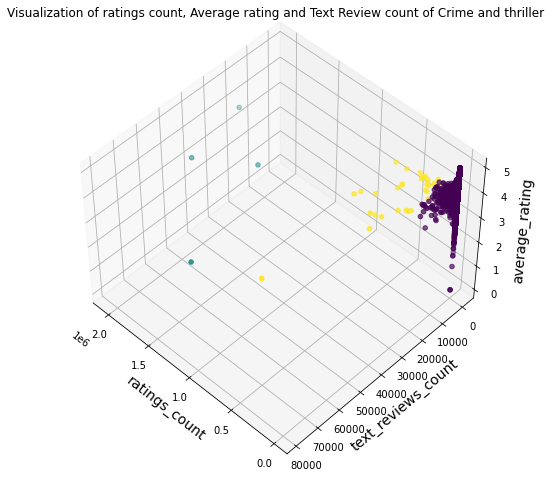

In [11]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(9,6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('ratings_count', fontsize = 14)
ax.set_ylabel('text_reviews_count', fontsize = 14)
ax.set_zlabel('average_rating', fontsize = 14)
ax.set_title('Visualization of ratings count, Average rating and Text Review count of Crime and thriller ')
ax.scatter(X[:, 1], X[:, 2], X[:, 0], c= labels.astype(np.float))